# Objective: The fundamental goal here is to model the CO2 emissions as a function of several car engine features.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the file

In [2]:
data = pd.read_csv("co2_emissions.csv")

In [3]:
data.shape

(7385, 12)

In [4]:
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [5]:
data.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [6]:
cat_cols = ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

for col in cat_cols:
    print(col, data[col].nunique())

make 42
model 2053
vehicle_class 16
transmission 5
fuel_type 5


# Details of columns
* make, car brand under study.
* model, the specific model of the car.
* vehicle_class, car body type of the car.
* engine_size, size of the car engine, in Liters.
* cylinders, number of cylinders.
* transmission,"A"for 'Automatic', "AM" for 'Automated manual', "AS" for 'Automatic with select shift', "AV" for 'Continuously          variable', "M" for 'Manual'.
* fuel_type, "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'.
* fuel_consumption_city, City fuel consumption ratings, in liters per 100 kilometers.
* fuel_consumption_hwy, Highway fuel consumption ratings, in liters per 100 kilometers.
* fuel_consumption_comb(l/100km), the combined fuel consumption rating (55% city, 45% highway), in L/100 km.
* fuel_consumption_comb(mpg), the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg).
* co2_emissions, the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer.


In [7]:
data.duplicated().sum() # To get the count of duplicated rows in the dataset

1112

In [8]:
data.drop_duplicates(inplace= True)

In [9]:
print("Dataframe shape after dropping duplicate records: ", data.shape)

Dataframe shape after dropping duplicate records:  (6273, 12)


In [10]:
data.reset_index(drop=True, inplace=True)
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6273 entries, 0 to 6272
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   object 
 1   model                           6273 non-null   object 
 2   vehicle_class                   6273 non-null   object 
 3   engine_size                     6273 non-null   float64
 4   cylinders                       6273 non-null   int64  
 5   transmission                    6273 non-null   object 
 6   fuel_type                       6273 non-null   object 
 7   fuel_consumption_city           6273 non-null   float64
 8   fuel_consumption_hwy            6273 non-null   float64
 9   fuel_consumption_comb(l/100km)  6273 non-null   float64
 10  fuel_consumption_comb(mpg)      6273 non-null   int64  
 11  co2_emissions                   6273 non-null   int64  
dtypes: float64(4), int64(3), object(5)

###  Now the dataset has 6273 records and 12 features with no missing and duplicate values


#  Analysis of numerical features

In [12]:
data.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,3.163000,5.620596,12.615591,9.073426,11.022111,27.395026,251.247250
std,1.365294,1.846424,3.550572,2.277893,2.945028,7.225472,59.235396
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [13]:
data.corr()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
engine_size,1.000000,0.928796,0.834325,0.766700,0.820183,-0.764060,0.854999
cylinders,0.928796,1.000000,0.801180,0.717321,0.780932,-0.724347,0.834697
fuel_consumption_city,0.834325,0.801180,1.000000,0.950733,0.994040,-0.927901,0.918528
fuel_consumption_hwy,0.766700,0.717321,0.950733,1.000000,0.978578,-0.892238,0.883153
fuel_consumption_comb(l/100km),0.820183,0.780932,0.994040,0.978578,1.000000,-0.926110,0.916611
fuel_consumption_comb(mpg),-0.764060,-0.724347,-0.927901,-0.892238,-0.926110,1.000000,-0.906839
co2_emissions,0.854999,0.834697,0.918528,0.883153,0.916611,-0.906839,1.000000


#### Target variable:
* CO2 Emissions generally increase when engine_size,cylinders, fuel_consumption_city,fuel_consumption_hwy, fuel_consumption_comb(l/100km) increases.

####  Independent   variables:
* As engine size increases, fuel_consumption_comb(L/100km), fuel consumption__hwy and number of cylinders are increases.
* As cylinders increases that shows positve coorelation with other variables.
* fuel_consumption_comb(mpg) shows a negative relation with all the other variables.

# Visualization

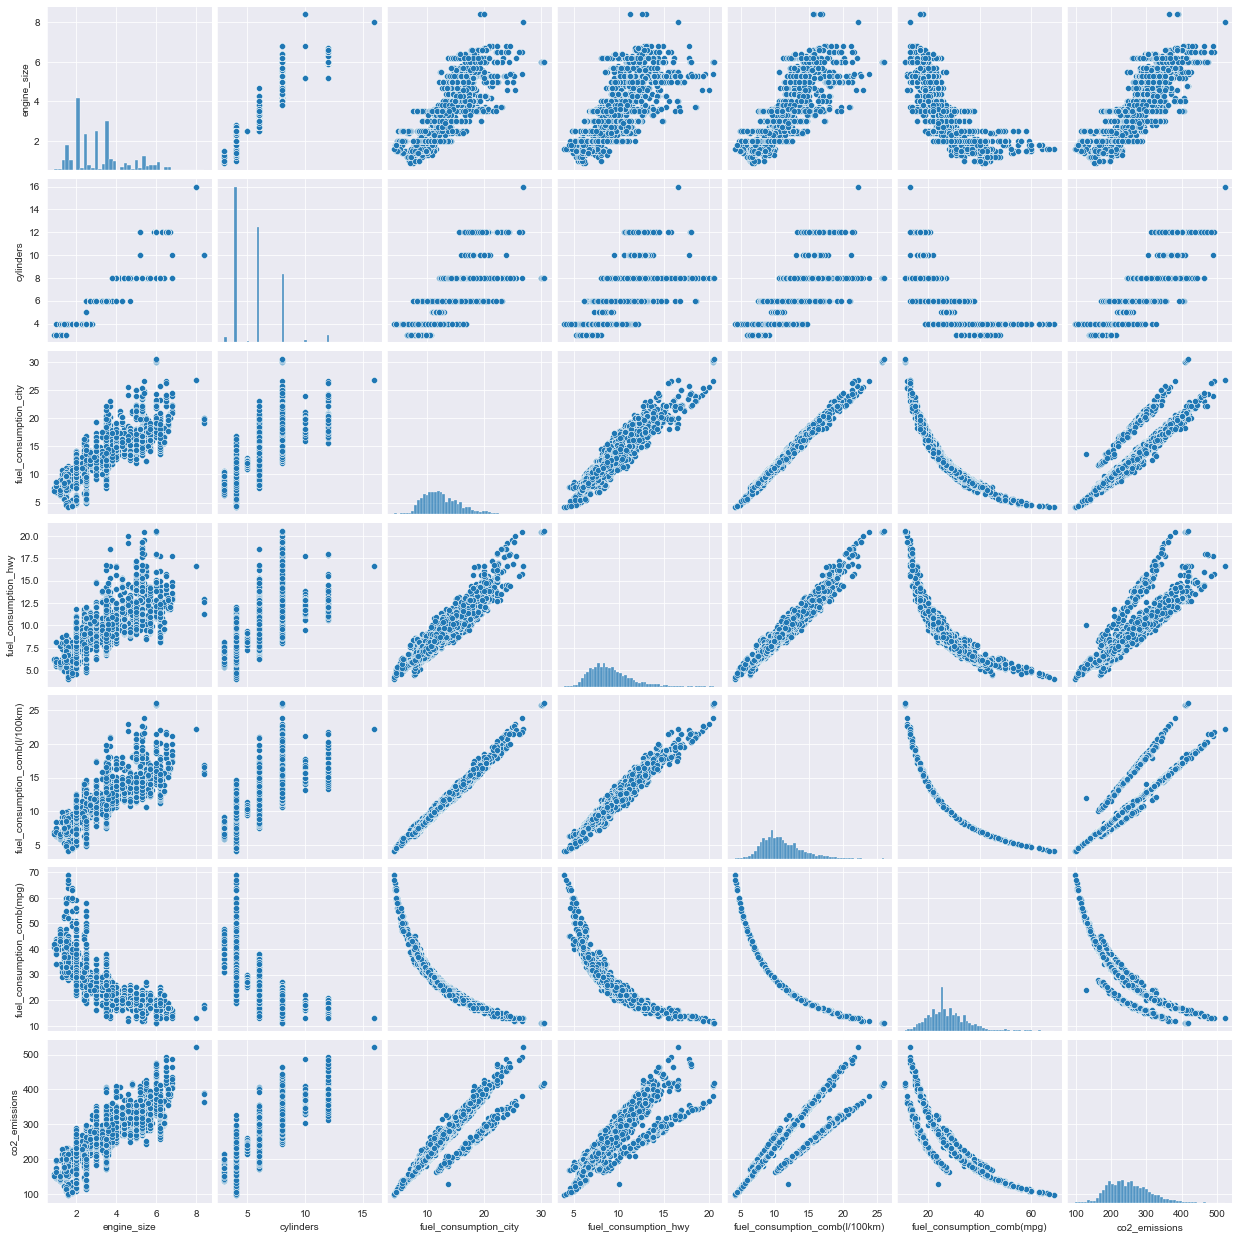

In [14]:
data1 = data.copy()
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Analysis of Categorical Variables

# Brand of cars

In [15]:
print("We have total",len(data1['make'].unique()),"Car Companies Data")
df_brand = data1['make'].value_counts().reset_index().rename(columns={'index':'make','make':'Count',})
df_brand.head(20)

We have total 42 Car Companies Data


,make,Count
0,FORD,575
1,CHEVROLET,515
2,BMW,501
3,MERCEDES-BENZ,365
4,PORSCHE,296
5,GMC,289
6,TOYOTA,274
7,AUDI,263
8,NISSAN,213
9,MINI,200


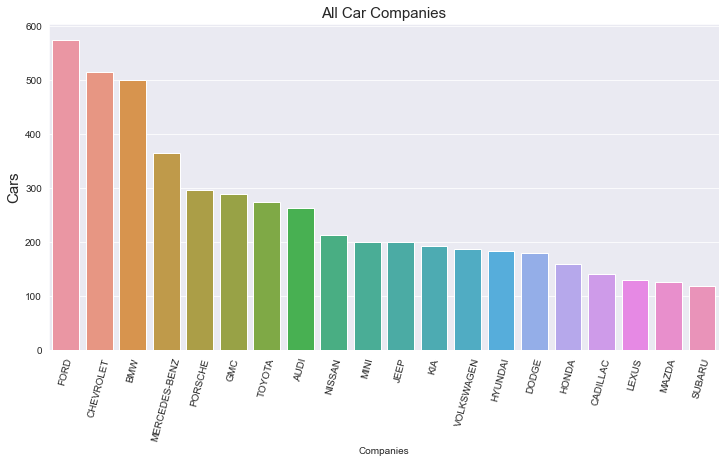

In [16]:
plt.figure(figsize=(12,6))
figure1 = sns.barplot(data = df_brand.head(20), x = "make",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Car Companies",size=15)
plt.xlabel("Companies")
plt.ylabel("Cars",size=15)
plt.show()


In [17]:
make_group = data1.groupby(by='make')['co2_emissions'].mean().reset_index().sort_values(by='co2_emissions', ascending=False).head(20)


In [18]:
make_group

,make,co2_emissions
6,BUGATTI,522.000000
22,LAMBORGHINI,402.270270
37,SRT,389.000000
34,ROLLS-ROYCE,388.750000
4,BENTLEY,367.914286
2,ASTON MARTIN,344.282051
26,MASERATI,318.134615
15,GMC,300.529412
33,RAM,294.180556
23,LAND ROVER,288.078947


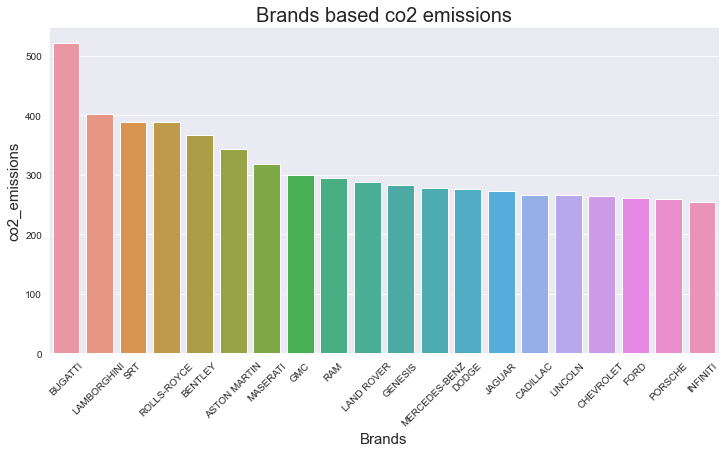

In [19]:
plt.figure(figsize=(12,6))
figure = sns.barplot(x = make_group['make'], y = make_group['co2_emissions'])
plt.title("Brands based co2 emissions",size =20)
plt.xlabel("Brands",size=15)
plt.xticks(rotation = 45)
plt.ylabel("co2_emissions",size=15)
plt.show()

# Models of cars

In [20]:
print("We have total",len(data1['model'].unique()),"Car Models")
df_model = data1['model'].value_counts().reset_index().rename(columns={'index': 'model','model':'Count'})
df_model.head(20)

We have total 2053 Car Models


,model,Count
0,F-150 FFV,32
1,F-150 FFV 4X4,31
2,MUSTANG,26
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,SONIC 5,18
7,ATS,18
8,JETTA,18
9,COMPASS,18


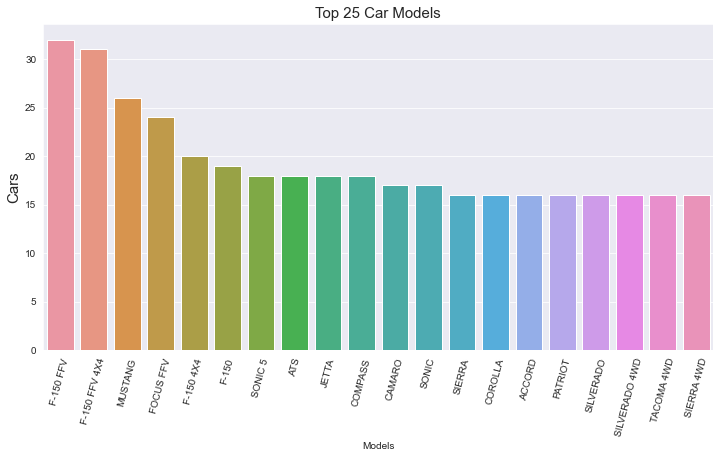

In [21]:
plt.figure(figsize=(12,6))
figure2 = sns.barplot(data = df_model.head(20), x = "model",  y= "Count")
plt.xticks(rotation = 75)
plt.title("Top 25 Car Models",size=15)
plt.xlabel("Models")
plt.ylabel("Cars",size=15)
plt.show()

In [22]:
model_group = data1.groupby(by='model')['co2_emissions'].mean().reset_index().sort_values(by='co2_emissions', ascending=False).head(20)
model_group

,model,co2_emissions
655,Chiron,522.000000
494,CHIRON,522.000000
392,Aventador Roadster,493.000000
753,E350 WAGON,488.000000
391,Aventador Coupe,486.000000
308,AMG G 65,472.000000
1292,Mulsanne,465.000000
371,AVENTADOR S ROADSTER,464.000000
369,AVENTADOR ROADSTER LP 740,461.000000
367,AVENTADOR COUPE LP 740,461.000000


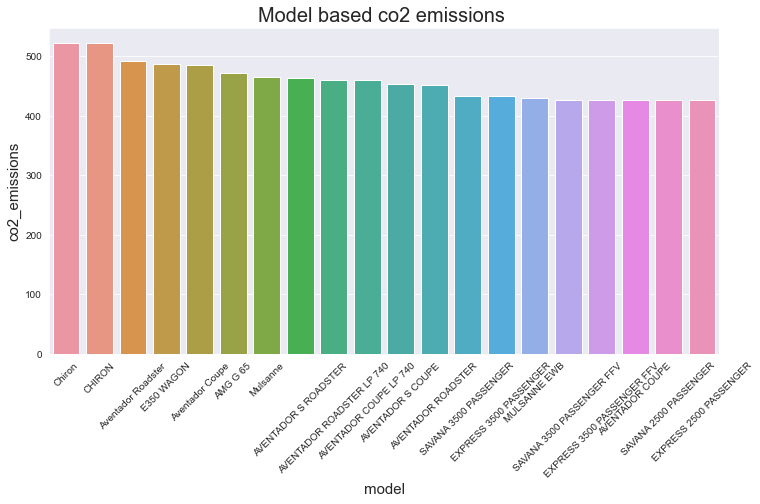

In [23]:
plt.figure(figsize=(12,6))
figure = sns.barplot(x = model_group['model'], y = model_group['co2_emissions'])
plt.title("Model based co2 emissions ",size = 20)
plt.xlabel("model",size=15)
plt.xticks(rotation = 45)
plt.ylabel("co2_emissions",size=15)
plt.show()

# Vehicle class


In [24]:
print("We have total",len(data1['vehicle_class'].unique()),"vehicle Class")
df_vehicle_class = data1['vehicle_class'].value_counts().reset_index().rename(columns={'index':'vehicle_class','vehicle_class':'Count'})
df_vehicle_class

We have total 16 vehicle Class


,vehicle_class,Count
0,SUV - SMALL,1004
1,MID-SIZE,981
2,COMPACT,902
3,SUV - STANDARD,613
4,SUBCOMPACT,532
5,FULL-SIZE,508
6,PICKUP TRUCK - STANDARD,474
7,TWO-SEATER,381
8,MINICOMPACT,274
9,STATION WAGON - SMALL,212


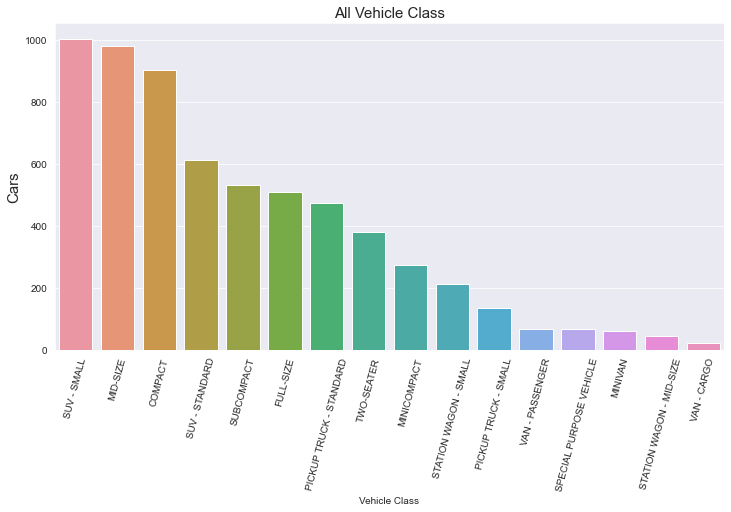

In [25]:
plt.figure(figsize=(12,6))
figure3 = sns.barplot(data = df_vehicle_class, x = "vehicle_class",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class",size=15)
plt.xlabel("Vehicle Class")
plt.ylabel("Cars",size=15)
plt.show()

In [26]:
vehicle_class_group = data1.groupby(by='vehicle_class')['co2_emissions'].mean().reset_index().sort_values(by='co2_emissions', ascending=False).head(20)

In [27]:
vehicle_class_group

,vehicle_class,co2_emissions
15,VAN - PASSENGER,397.212121
14,VAN - CARGO,361.500000
12,SUV - STANDARD,306.730832
6,PICKUP TRUCK - STANDARD,301.514768
13,TWO-SEATER,282.086614
5,PICKUP TRUCK - SMALL,277.022556
1,FULL-SIZE,264.407480
4,MINIVAN,261.114754
10,SUBCOMPACT,244.616541
8,STATION WAGON - MID-SIZE,240.755556


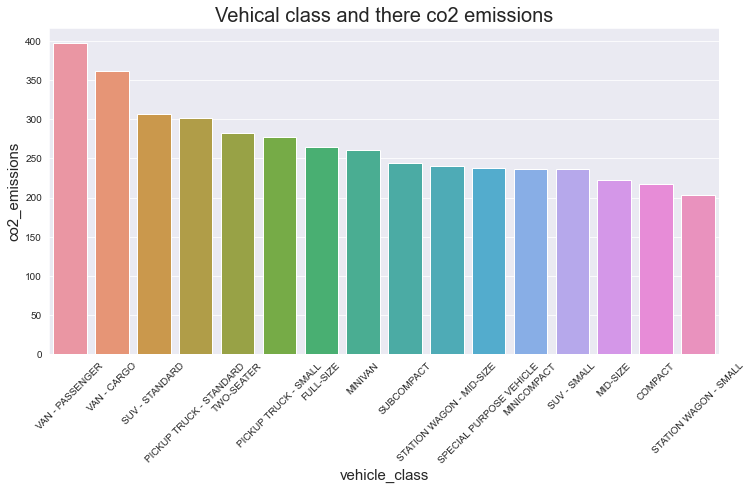

In [28]:
plt.figure(figsize=(12,6))
figure = sns.barplot(x = vehicle_class_group['vehicle_class'], y = vehicle_class_group['co2_emissions'])
plt.title("Vehical class and there co2 emissions",size = 20)
plt.xlabel("vehicle_class",size=15)
plt.xticks(rotation = 45)
plt.ylabel("co2_emissions",size=15)
plt.show()

In [29]:
categorical_group = data1.groupby(by=['make', 'model', 'vehicle_class'])['co2_emissions'].mean().reset_index()

In [30]:
categorical_group.sort_values(by='co2_emissions', ascending=False).head(10)

,make,model,vehicle_class,co2_emissions
375,BUGATTI,Chiron,TWO-SEATER,522.0
374,BUGATTI,CHIRON,TWO-SEATER,522.0
1176,LAMBORGHINI,Aventador Roadster,TWO-SEATER,493.0
675,FORD,E350 WAGON,VAN - PASSENGER,488.0
1175,LAMBORGHINI,Aventador Coupe,TWO-SEATER,486.0
1408,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,472.0
158,BENTLEY,Mulsanne,MID-SIZE,465.0
1174,LAMBORGHINI,AVENTADOR S ROADSTER,TWO-SEATER,464.0
1170,LAMBORGHINI,AVENTADOR COUPE LP 740,TWO-SEATER,461.0
1172,LAMBORGHINI,AVENTADOR ROADSTER LP 740,TWO-SEATER,461.0


# Fuel Type of Cars

In [31]:
data1['fuel_type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

### Here we have to map similar labels into a single label for our Fuel Type column

In [32]:
data1["fuel_type"] = np.where(data1["fuel_type"]=="Z", "Premium Gasoline", data["fuel_type"])
data1["fuel_type"] = np.where(data1["fuel_type"]=="X", "Regular Gasoline", data["fuel_type"])
data1["fuel_type"] = np.where(data1["fuel_type"]=="D", "Diesel", data["fuel_type"])
data1["fuel_type"] = np.where(data1["fuel_type"]=="E", "Ethanol(E85)", data["fuel_type"])
data1["fuel_type"] = np.where(data1["fuel_type"]=="N", "Natural Gas", data["fuel_type"])

In [33]:
print("We have total",len(data1['fuel_type'].unique()),"Fuel Types")
df_fuel_type = data1['fuel_type'].value_counts().reset_index().rename(columns={'index':'fuel_type','fuel_type':'Count'})
df_fuel_type

We have total 5 Fuel Types


,fuel_type,Count
0,X,3030
1,Z,2765
2,E,330
3,D,147
4,Natural Gas,1


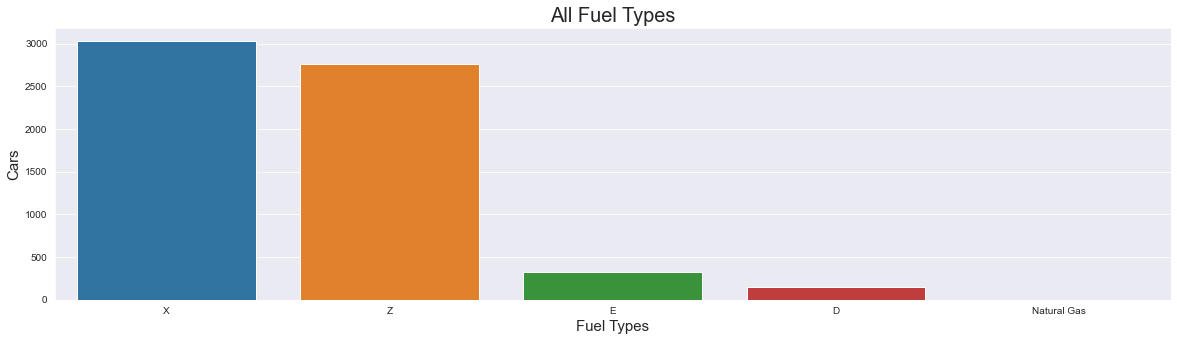

In [34]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = df_fuel_type, x = "fuel_type",  y= "Count")
plt.title("All Fuel Types",size = 20)
plt.xlabel("Fuel Types",size = 15)
plt.ylabel("Cars",size=15)
plt.show()

In [35]:
fuel_type_group = data1.groupby(by='fuel_type')['co2_emissions'].mean().reset_index().sort_values(by='co2_emissions', ascending=False).head(20)
fuel_type_group

,fuel_type,co2_emissions
1,E,276.048485
4,Z,265.731284
3,X,236.118152
0,D,235.238095
2,Natural Gas,213.000000


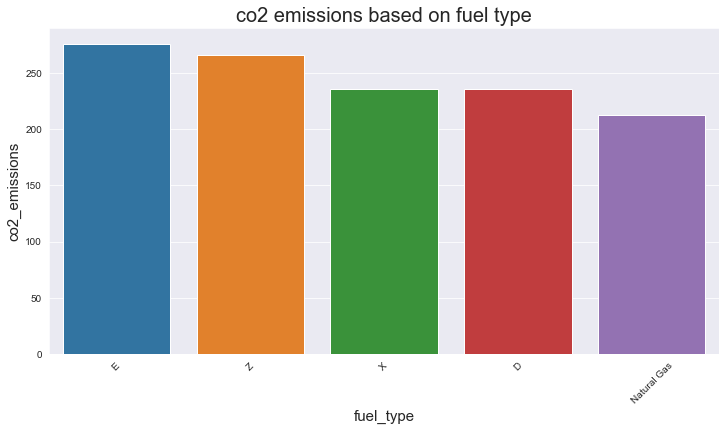

In [36]:
plt.figure(figsize=(12,6))
figure = sns.barplot(x = fuel_type_group['fuel_type'], y = fuel_type_group['co2_emissions'])
plt.title("co2 emissions based on fuel type",size =20)
plt.xlabel("fuel_type",size=15)
plt.xticks(rotation = 45)
plt.ylabel("co2_emissions",size=15)
plt.show()

# Transmission

In [37]:
data1['transmission'].unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

In [38]:
data1["transmission"] = np.where(data1["transmission"]=="AS", "Automatic Shift", data["transmission"])
data1["transmission"] = np.where(data1["transmission"]=="M", "Manual", data["transmission"])
data1["transmission"] = np.where(data1["transmission"]=="AV", "Continuously Variable", data["transmission"])
data1["transmission"] = np.where(data1["transmission"]=="AM", "Automated Manual", data["transmission"])
data1["transmission"] = np.where(data1["transmission"]=="A", "Automatic", data["transmission"])

In [39]:
print("We have total",len(data1['transmission'].unique()),"transmissions")
df_transmission = data1['transmission'].value_counts().reset_index().rename(columns={'index':'transmission','transmission':'Count'})
df_transmission

We have total 5 transmissions


,transmission,Count
0,AS,2720
1,Automatic,1536
2,M,1019
3,AM,540
4,AV,458


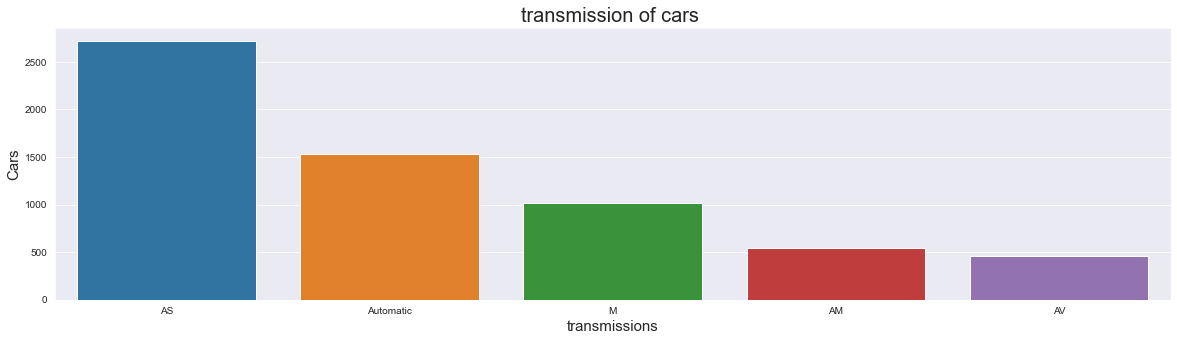

In [40]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = df_transmission, x = "transmission",  y= "Count")
plt.title("transmission of cars ",size = 20)
plt.xlabel("transmissions",size = 15)
plt.ylabel("Cars",size=15)
plt.show()

In [41]:
transmission_group = data1.groupby(by='transmission')['co2_emissions'].mean().reset_index().sort_values(by='co2_emissions', ascending=False).head(20)
transmission_group

,transmission,co2_emissions
3,Automatic,278.453776
1,AS,255.652206
0,AM,251.788889
4,M,228.347399
2,AV,184.155022


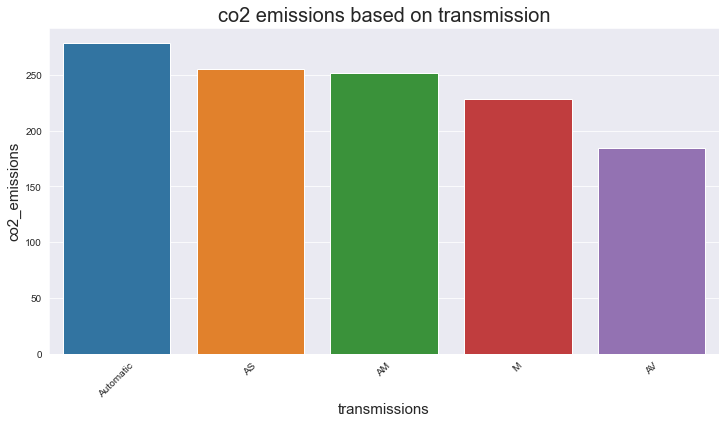

In [42]:
plt.figure(figsize=(12,6))
figure = sns.barplot(x = transmission_group['transmission'], y = transmission_group['co2_emissions'])
plt.title("co2 emissions based on transmission",size =20)
plt.xlabel("transmissions",size=15)
plt.xticks(rotation = 45)
plt.ylabel("co2_emissions",size=15)
plt.show()

### Histograms

In [43]:
num_cols = ['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)']

Histogram of  engine_size


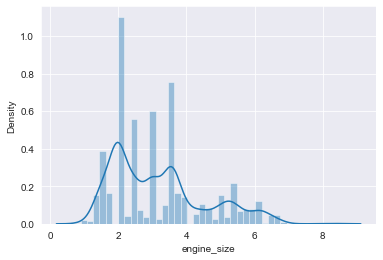

Histogram of  cylinders


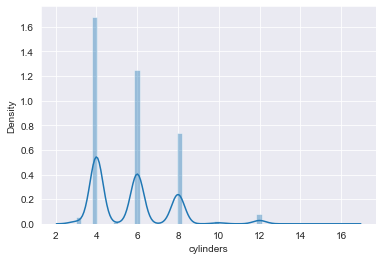

Histogram of  fuel_consumption_city


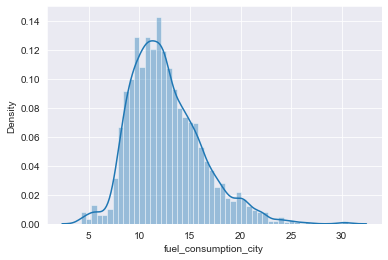

Histogram of  fuel_consumption_hwy


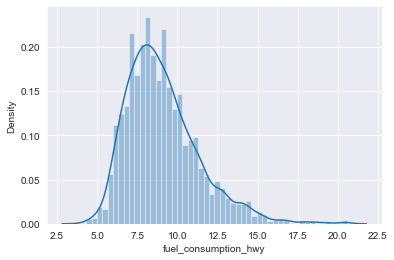

Histogram of  fuel_consumption_comb(l/100km)


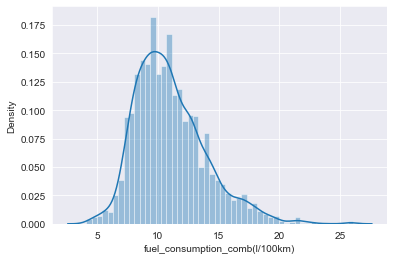

Histogram of  fuel_consumption_comb(mpg)


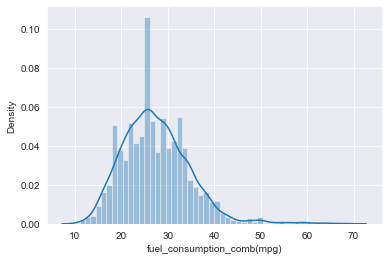

In [44]:
for i in num_cols:
    print("Histogram of ",i)
    sns.distplot(data1[i])
    plt.show()

###  Boxplots for finding outliers

Box plots of  engine_size


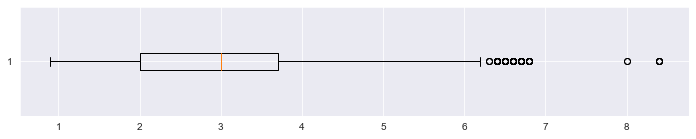

Box plots of  cylinders


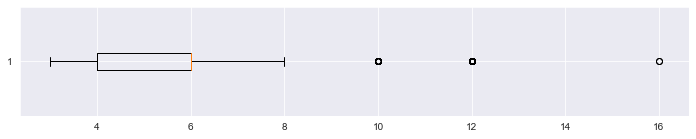

Box plots of  fuel_consumption_city


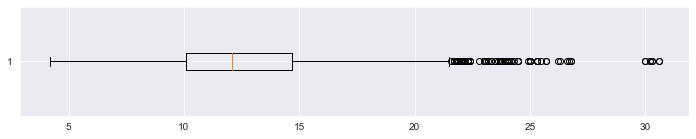

Box plots of  fuel_consumption_hwy


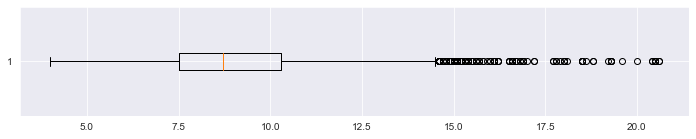

Box plots of  fuel_consumption_comb(l/100km)


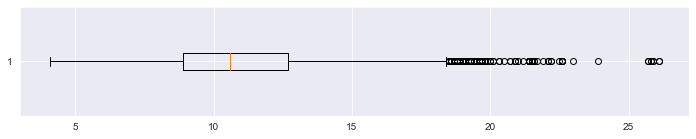

Box plots of  fuel_consumption_comb(mpg)


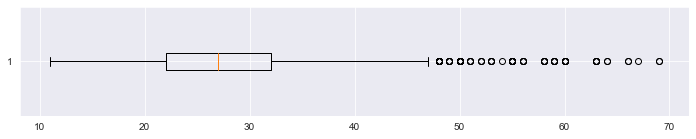

In [45]:
for i in num_cols:
    print("Box plots of ",i)
    plt.figure(figsize= (12,2))
    plt.boxplot(data1[i],vert = False)
    plt.show()

### Model Building and Evaluation with outliers

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Encoding Categorical features
encoder = LabelEncoder()

categorical_columns = ['make','model', 'vehicle_class', 'transmission', 'fuel_type']

# Initialize an empty dictionary to store the Label Encoders
label_encoders = {}

# Perform Label Encoding for each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


data[cat_cols] = data[cat_cols].apply(encoder.fit_transform)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6273 entries, 0 to 6272
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   int64  
 1   model                           6273 non-null   int64  
 2   vehicle_class                   6273 non-null   int64  
 3   engine_size                     6273 non-null   float64
 4   cylinders                       6273 non-null   int64  
 5   transmission                    6273 non-null   int64  
 6   fuel_type                       6273 non-null   int64  
 7   fuel_consumption_city           6273 non-null   float64
 8   fuel_consumption_hwy            6273 non-null   float64
 9   fuel_consumption_comb(l/100km)  6273 non-null   float64
 10  fuel_consumption_comb(mpg)      6273 non-null   int64  
 11  co2_emissions                   6273 non-null   int64  
dtypes: float64(4), int64(8)
memory usa

In [48]:
X = data.drop(columns='co2_emissions')
Y = data['co2_emissions']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=31)

In [50]:
X_test['baseline_predictions'] = Y.mean()

In [51]:
X_test.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),baseline_predictions
463,15,1770,11,2.4,4,0,3,10.5,7.3,9.1,31,251.24725
5206,16,1400,11,3.5,6,0,3,12.4,8.7,10.7,26,251.24725
164,8,587,2,2.0,4,2,4,11.9,7.9,10.1,28,251.24725
2749,27,1231,2,2.5,4,2,3,8.5,5.9,7.3,39,251.24725
2536,17,1670,1,2.4,4,2,3,9.4,6.5,8.1,35,251.24725


In [74]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5007, 11)
(1252, 11)
(5018,)
(1255,)


In [52]:
print("RMSE for Baseline Model: ", np.sqrt(mean_squared_error(Y_test, X_test['baseline_predictions'])))

RMSE for Baseline Model:  58.63367439477692


In [53]:
X_test.drop(columns='baseline_predictions', inplace=True)

In [54]:
# List of Regression models
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = {
    'Linear_Regression'         : LinearRegression(),
    'Lasso_regression'          : Lasso(), 
    'Ridge_regression'          : Ridge(), 
    'Decision_Tree_Regression'  : DecisionTreeRegressor(),
    'Random_Forest_Regression'  : RandomForestRegressor()  
}


In [55]:
for model in models:
    mod = models[model]
    mod.fit(X_train, Y_train)
    predictions_train = mod.predict(X_train)
    predictions_test = mod.predict(X_test)
    print("Train RMSE for {} is {}".format(model, np.sqrt(mean_squared_error(Y_train, predictions_train))))
    print("Test RMSE for {} is {}".format(model, np.sqrt(mean_squared_error(Y_test, predictions_test))))
    print('Train R2 Value for {} is {}'.format(model, r2_score(Y_train, predictions_train)))
    print('Test R2 Value for {} is {}'.format(model, r2_score(Y_test, predictions_test)))
    print('*************************************************************************************')

Train RMSE for Linear_Regression is 17.242784734751975
Test RMSE for Linear_Regression is 17.064973116057907
Train R2 Value for Linear_Regression is 0.9156751493639886
Test R2 Value for Linear_Regression is 0.9152704147307796
*************************************************************************************
Train RMSE for Lasso_regression is 17.34317813477261
Test RMSE for Lasso_regression is 17.104811585404157
Train R2 Value for Lasso_regression is 0.9146903544397211
Test R2 Value for Lasso_regression is 0.91487434764764
*************************************************************************************
Train RMSE for Ridge_regression is 17.242858966471683
Test RMSE for Ridge_regression is 17.061956916194962
Train R2 Value for Ridge_regression is 0.9156744233104831
Test R2 Value for Ridge_regression is 0.9153003636532606
*************************************************************************************
Train RMSE for Decision_Tree_Regression is 0.9054732237901515
Test RMSE for

# Model building and evaluation after Checking for Outliers through Cook's distance

In [56]:
import pandas as pd
import statsmodels.api as sm

In [57]:
# Filter out non-numeric columns
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

# Ensure the target variable is excluded from the feature set
target_variable = 'co2_emissions'
numeric_columns = [col for col in numeric_columns if col != target_variable]

# Create a new DataFrame containing only numeric columns
df_numeric = data[numeric_columns + [target_variable]]


In [58]:
# Assuming 'target_variable' is the column you want to predict
X = df_numeric.drop(columns=[target_variable])
X = sm.add_constant(X)  # Add a constant term for the intercept in the linear regression model
y = df_numeric[target_variable]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# To Get the influence object from the fitted model
infl = model.get_influence()

# Calculate Cook's distance for each data point
cooks_distance = infl.cooks_distance[0]

# Convert the Cook's distance to a pandas Series for easier analysis
cooks_distance_series = pd.Series(cooks_distance, name='Cook\'s Distance')

# Combine the Cook's distance with the original DataFrame
df_with_cooks_distance = pd.concat([df_numeric, cooks_distance_series], axis=1)


# Find the data points with the highest Cook's distance values
a = df_numeric.shape[1]
b = df_numeric.shape[0]
threshold = 3*((a+1)/b)  # Leverage cutoff for outliers

print("Outliers Threshold is: ", threshold)
outliers = df_with_cooks_distance[df_with_cooks_distance['Cook\'s Distance'] > threshold]

# Remove the influential data points from the original DataFrame
df_cleaned = data.drop(outliers.index).reset_index(drop=True)
print('Dataframe before removing outliers: ', data.shape)
print("Dataframe after removing outliers: ", df_cleaned.shape)

Outliers Threshold is:  0.006217120994739358
Dataframe before removing outliers:  (6273, 12)
Dataframe after removing outliers:  (6259, 12)


In [59]:
df_model  = df_cleaned.copy()
df_model.shape

(6259, 12)

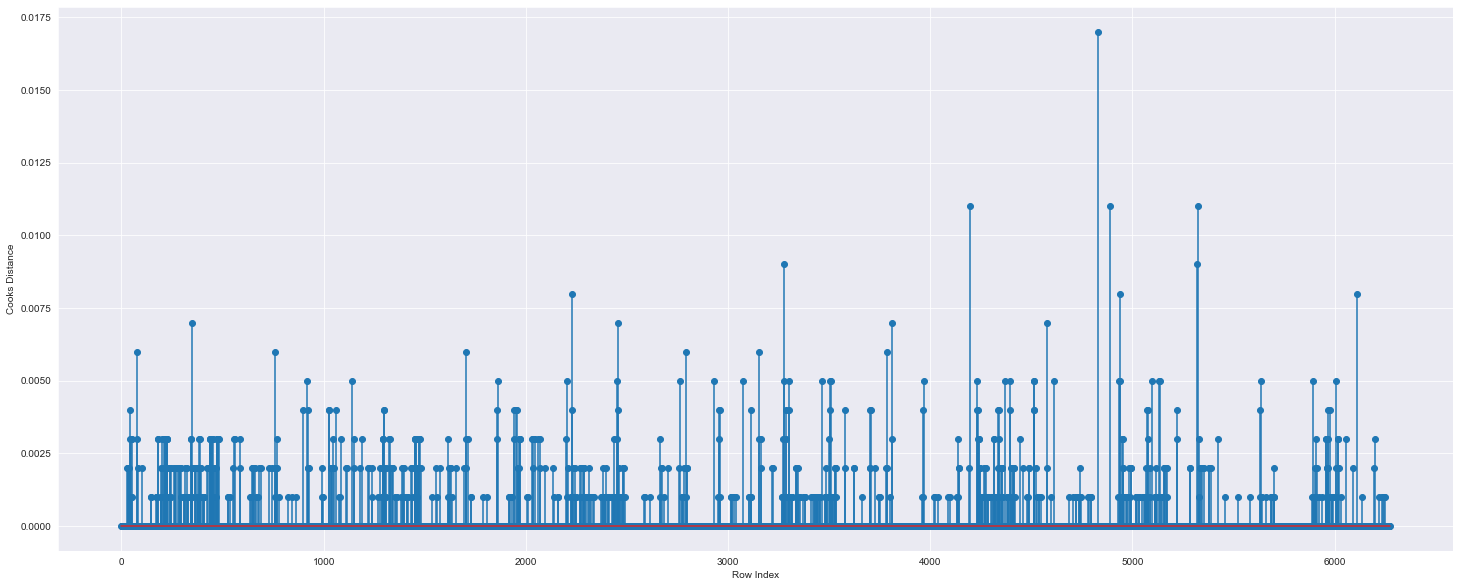

In [60]:
fig = plt.subplots(figsize =(25,10))
plt.stem(np.arange(len(data)), np.round(cooks_distance,3), use_line_collection= True)
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

<Figure size 576x576 with 0 Axes>

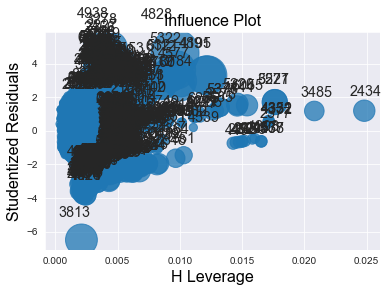

In [61]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize=(8, 8))
influence_plot(model)
plt.show()

# Train Test Split

In [62]:
X = df_model.drop(['co2_emissions'], axis=1)
y = df_model['co2_emissions']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# List of Regression models
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = {
    'Linear_Regression'         : LinearRegression(),
    'Lasso_regression'          : Lasso(), 
    'Ridge_regression'          : Ridge(), 
    'Decision_Tree_Regression'  : DecisionTreeRegressor(),
    'Random_Forest_Regression'  : RandomForestRegressor()  
}


In [65]:
for model in models:
    mod = models[model]
    mod.fit(X_train, y_train)
    predictions_train = mod.predict(X_train)
    predictions_test = mod.predict(X_test)
    print("Train RMSE for {} is {}".format(model, np.sqrt(mean_squared_error(y_train, predictions_train))))
    print("Test RMSE for {} is {}".format(model, np.sqrt(mean_squared_error(y_test, predictions_test))))
    print('Train R2 Value for {} is {}'.format(model, r2_score(y_train, predictions_train)))
    print('Test R2 Value for {} is {}'.format(model, r2_score(y_test, predictions_test)))
    print('*************************************************************************************')

Train RMSE for Linear_Regression is 16.67347747261771
Test RMSE for Linear_Regression is 17.593033892952366
Train R2 Value for Linear_Regression is 0.918469481359188
Test R2 Value for Linear_Regression is 0.9108283654447904
*************************************************************************************
Train RMSE for Lasso_regression is 16.777821816831484
Test RMSE for Lasso_regression is 17.778283521990282
Train R2 Value for Lasso_regression is 0.9174458354958807
Test R2 Value for Lasso_regression is 0.908940574792344
*************************************************************************************
Train RMSE for Ridge_regression is 16.673480864904345
Test RMSE for Ridge_regression is 17.59334269647645
Train R2 Value for Ridge_regression is 0.9184694481837551
Test R2 Value for Ridge_regression is 0.9108252350288729
*************************************************************************************
Train RMSE for Decision_Tree_Regression is 0.9321749495001467
Test RMSE for 

# final model

In [66]:
final_model=RandomForestRegressor()
final_model.fit(X_train, y_train)
predictions_train =final_model.predict(X_train)
predictions_test =final_model.predict(X_test)
print("Train RMSE for {} is {}".format('Random Forest Regression', np.sqrt(mean_squared_error(y_train, predictions_train))))
print("Test RMSE for {} is {}".format('Random Forest Regression', np.sqrt(mean_squared_error(y_test, predictions_test))))
print('Train R2 Value for {} is {}'.format('Random Forest Regression', r2_score(y_train, predictions_train)))
print('Test R2 Value for {} is {}'.format("Random Forest Regression", r2_score(y_test, predictions_test)))
print('*************************************************************************************')

Train RMSE for Random Forest Regression is 1.3813128127048637
Test RMSE for Random Forest Regression is 2.8077269979870394
Train R2 Value for Random Forest Regression is 0.9994404332359338
Test R2 Value for Random Forest Regression is 0.9977288019594569
*************************************************************************************


In [67]:
predictions = final_model.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predictions': predictions})
pred_df.tail()


,Actual,Predictions
5770,241,239.413167
1611,260,261.562500
6004,331,330.764000
952,258,257.850000
3573,235,233.503333


In [68]:
# K-Fold cross validation
kfold = KFold(n_splits=5)
model = RandomForestRegressor()
results = cross_val_predict(model, X, y, cv=kfold)
print("RMSE for Ridge Regression Model: ", np.sqrt(mean_squared_error(y, results)))
print('R2 Values for Ridge Regression Model: ', r2_score(y, results))

RMSE for Ridge Regression Model:  3.6270447664380905
R2 Values for Ridge Regression Model:  0.9961557024558756


# Saving the Ridge Regresssion model for future prediction

In [69]:
import pickle
from pickle import dump,load

filename = 'final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))# it wiil create a final model.sav file

with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)
 
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) # this line will load data to final model.sav
result = loaded_model.predict(X_test)
print('R2 value for the model is: ', r2_score(y_test, result))

R2 value for the model is:  0.9977288019594569


In [75]:
data1.sample()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
2494,HONDA,ACCORD SEDAN,MID-SIZE,3.5,6,Automatic,X,11.3,7.0,9.4,30,219
